In [3]:
# 한글 처리를 위한 matplotlib 설정. (실행 후 런타임 세션 다시 시작)
import matplotlib.pyplot as plt

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [4]:
import pandas as pd

# cp949 : 한국어 Windows 환경에서 널리 사용되는 인코딩. (지정 안 해주면 에러 발생)
walk_df = pd.read_csv('/content/S-DoT_WALK_2025.11.03-11.09.csv', encoding='cp949')
print(walk_df)

          모델번호   시리얼                 측정시간                   지역  \
0      SDOT001  4053  2025-11-02_23:50:00     residential_area   
1      SDOT001  3023  2025-11-02_23:56:00  traditional_markets   
2      SDOT001  4064  2025-11-02_23:57:00                parks   
3      SDOT001  3018  2025-11-02_23:56:00  traditional_markets   
4      SDOT001  4060  2025-11-02_23:51:00                parks   
...        ...   ...                  ...                  ...   
87317  SDOT001  4094  2025-11-09_23:43:00      commercial_area   
87318  SDOT001  4004  2025-11-09_23:46:00          main_street   
87319  SDOT001  3039  2025-11-09_23:46:00  traditional_markets   
87320  SDOT001  2994  2025-11-09_23:46:00  traditional_markets   
87321  SDOT001  4009  2025-11-09_23:46:00          main_street   

                    자치구                행정동  방문자수                  등록일  
0           Gwangjin-gu     Gwangjang-dong     1  2025-11-03 00:08:05  
1           Jungnang-gu   Junghwa2(i)-dong    74  2025-11-03 00

In [5]:
# describe() : 연속형/이산형 변수에 대한 기술통계만을 제공.
print(walk_df.describe())
print(walk_df.info())
print(walk_df.isnull().sum())

                시리얼          방문자수
count  87322.000000  87322.000000
mean    3764.054774     63.249880
std      455.847499     87.932488
min     2993.000000      0.000000
25%     3037.000000      3.000000
50%     4024.000000     26.000000
75%     4049.000000    104.000000
max     4095.000000    995.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87322 entries, 0 to 87321
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   모델번호    87322 non-null  object
 1   시리얼     87322 non-null  int64 
 2   측정시간    87322 non-null  object
 3   지역      87322 non-null  object
 4   자치구     87322 non-null  object
 5   행정동     87322 non-null  object
 6   방문자수    87322 non-null  int64 
 7   등록일     87322 non-null  object
dtypes: int64(2), object(6)
memory usage: 5.3+ MB
None
모델번호    0
시리얼     0
측정시간    0
지역      0
자치구     0
행정동     0
방문자수    0
등록일     0
dtype: int64


In [6]:
# 문자열 날짜 -> 날짜 형식으로 변환.

walk_df['측정시간'] = pd.to_datetime(walk_df['측정시간'], format='%Y-%m-%d_%H:%M:%S')
print(walk_df.describe(include='all'))

           모델번호           시리얼                           측정시간           지역  \
count     87322  87322.000000                          87322        87322   
unique        1           NaN                            NaN            8   
top     SDOT001           NaN                            NaN  main_street   
freq      87322           NaN                            NaN        32400   
mean        NaN   3764.054774  2025-11-06 16:14:07.298504704          NaN   
min         NaN   2993.000000            2025-11-02 23:50:00          NaN   
25%         NaN   3037.000000            2025-11-04 20:46:00          NaN   
50%         NaN   4024.000000            2025-11-06 17:57:00          NaN   
75%         NaN   4049.000000            2025-11-08 11:14:00          NaN   
max         NaN   4095.000000            2025-11-09 23:48:00          NaN   
std         NaN    455.847499                            NaN          NaN   

            자치구          행정동          방문자수                  등록일  
count    

In [7]:
walk_df['요일'] = walk_df['측정시간'].dt.day_name()
print(walk_df['요일'])
print(walk_df['측정시간'].head())
print()

# 0, 1, 2, 3, 4, 5, 6 : 월, 화, 수, 목, 금, 토, 일
walk_df['주말여부'] = walk_df['측정시간'].dt.dayofweek >= 5
print(walk_df['주말여부'])

0        Sunday
1        Sunday
2        Sunday
3        Sunday
4        Sunday
          ...  
87317    Sunday
87318    Sunday
87319    Sunday
87320    Sunday
87321    Sunday
Name: 요일, Length: 87322, dtype: object
0   2025-11-02 23:50:00
1   2025-11-02 23:56:00
2   2025-11-02 23:57:00
3   2025-11-02 23:56:00
4   2025-11-02 23:51:00
Name: 측정시간, dtype: datetime64[ns]

0        True
1        True
2        True
3        True
4        True
         ... 
87317    True
87318    True
87319    True
87320    True
87321    True
Name: 주말여부, Length: 87322, dtype: bool


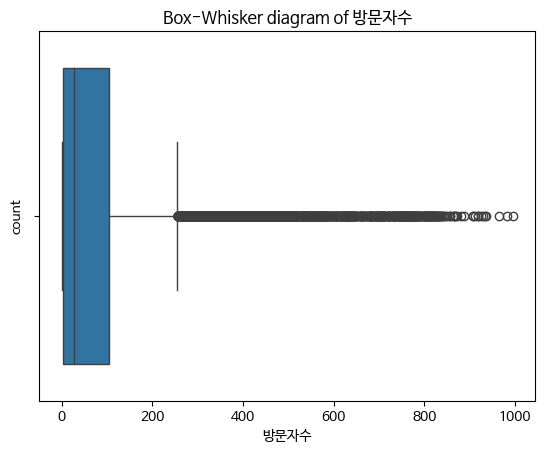

In [8]:
# 상자-수염 그림으로 이상치 여부 확인.
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=walk_df, x='방문자수')
plt.title('Box-Whisker diagram of 방문자수')
plt.xlabel('방문자수')
plt.ylabel('count')
plt.show()

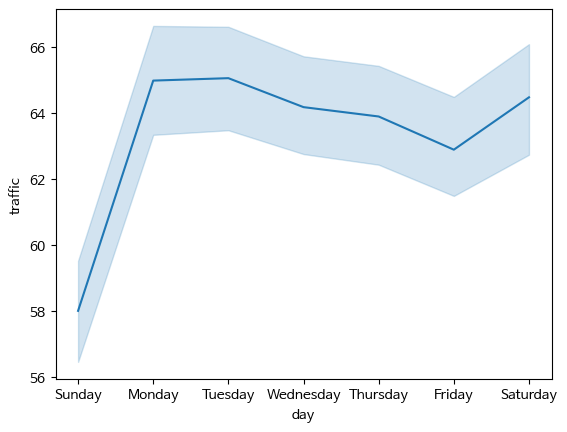

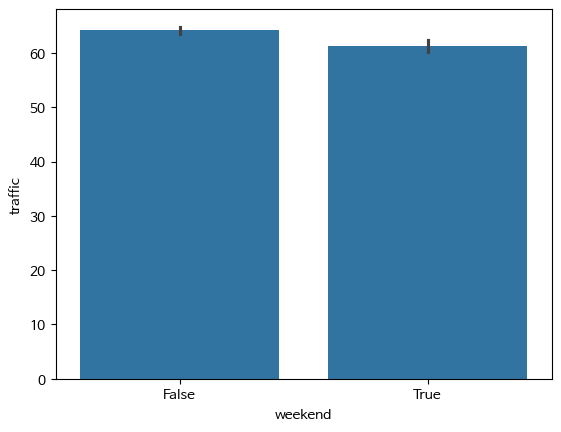

In [9]:
# lineplot() : 꺾은선 그래프.
sns.lineplot(data=walk_df, x='요일', y='방문자수')
plt.xlabel('day')
plt.ylabel('traffic')
plt.show()

sns.barplot(data=walk_df, x='주말여부', y='방문자수')
plt.xlabel('weekend')
plt.ylabel('traffic')
plt.show()

In [10]:
weekend_df = walk_df[walk_df['주말여부']]
weekday_df = walk_df[~walk_df['주말여부']]
print(weekend_df.head())
print(weekend_df.describe())
print('====================================')
print(weekday_df.head())
print(weekday_df.describe())

print('주말 일별 평균 방문자수', weekend_df['방문자수'].mean())
print('주중 일별 평균 방문자수', weekday_df['방문자수'].mean())

      모델번호   시리얼                측정시간                   지역               자치구  \
0  SDOT001  4053 2025-11-02 23:50:00     residential_area       Gwangjin-gu   
1  SDOT001  3023 2025-11-02 23:56:00  traditional_markets       Jungnang-gu   
2  SDOT001  4064 2025-11-02 23:57:00                parks  Seoul_Grand_Park   
3  SDOT001  3018 2025-11-02 23:56:00  traditional_markets       Jungnang-gu   
4  SDOT001  4060 2025-11-02 23:51:00                parks  Seoul_Grand_Park   

                행정동  방문자수                  등록일      요일  주말여부  
0    Gwangjang-dong     1  2025-11-03 00:08:05  Sunday  True  
1  Junghwa2(i)-dong    74  2025-11-03 00:08:05  Sunday  True  
2           skylift     0  2025-11-03 00:08:05  Sunday  True  
3      Muk2(i)-dong     0  2025-11-03 00:08:05  Sunday  True  
4    women_parking1     0  2025-11-03 00:08:05  Sunday  True  
                시리얼                           측정시간          방문자수
count  27295.000000                          27295  27295.000000
mean    3811.9692

In [11]:
from scipy.stats import shapiro

'''
정규 분포를 따르는지 확인.
귀무가설(H0): 데이터가 정규 분포를 따름.
대립가설(H1): 데이터가 정규 분포를 따르지 않음.
'''
weekday_visitors_normality = shapiro(weekday_df['방문자수'])
weekend_visitors_normality = shapiro(weekend_df['방문자수'])
print('주중 방문자수 정규성 검정 결과: ', weekday_visitors_normality)
print('주말 방문자수 정규성 검정 결과: ', weekend_visitors_normality)

'''
결과        주중 방문자수 주말 방문자수
검정 통계량(W)     0.731          0.648
p-값            3.66e-128      3.98e-115

p-값에 의한 결론 도출판단 기준: 일반적으로 유의수준을 0.05로 설정.
두 데이터 모두 p-value ≪ 0.05
==> 결론: 귀무가설 기각 → 정규 분포를 따르지 않음.

검정 통계량 W의 의미.
W는 0 ~ 1 사이의 값.
-> 1에 가까울수록 정규분포와 유사.
-> 0에 가까울수록 정규분포에서 크게 벗어남.

결과: 0.731 / 0.648 → 1과 매우 멈.
==> 실제 데이터 형태가 정규성과 크게 어긋남을 의미.
'''

주중 방문자수 정규성 검정 결과:  ShapiroResult(statistic=np.float64(0.731281154084914), pvalue=np.float64(3.6666973227438245e-128))
주말 방문자수 정규성 검정 결과:  ShapiroResult(statistic=np.float64(0.6483615938820155), pvalue=np.float64(3.986953493608205e-115))


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 60027.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27295.
  res = hypotest_fun_out(*samples, **kwds)


'\n결과        주중 방문자수 주말 방문자수\n검정 통계량(W)     0.731          0.648\np-값            3.66e-128      3.98e-115\n\np-값에 의한 결론 도출판단 기준: 일반적으로 유의수준을 0.05로 설정.\n두 데이터 모두 p-value ≪ 0.05\n==> 결론: 귀무가설 기각 → 정규 분포를 따르지 않음.\n\n검정 통계량 W의 의미.\nW는 0 ~ 1 사이의 값.\n-> 1에 가까울수록 정규분포와 유사.\n-> 0에 가까울수록 정규분포에서 크게 벗어남.\n\n결과: 0.731 / 0.648 → 1과 매우 멈.\n==> 실제 데이터 형태가 정규성과 크게 어긋남을 의미.\n'

In [13]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(weekday_df['방문자수'], weekend_df['방문자수'], equal_var=False)
print(f'T-statistic: {t_stat}, p-value: {p_value}\n')


'''
귀무가설(H0): 주중 방문자수 평균 = 주말 방문자수 평균.
대립가설(H1): 주중과 주말의 평균 방문자수는 서로 다름.

p-value = 0.0000129
→ 0.05보다 훨씬 작음

결론: 귀무가설 기각
→ 주중과 주말 방문자수의 평균은 통계적으로 유의한 차이가 있음.

즉, 주중과 주말의 평균 방문자수는 서로 다름.
차이가 '우연' 이라고 보기 어려움 (매우 유의미함)

====================================================
t-statistic = 4.36
(t값이 크면 → 두 그룹 평균이 많이 다름. t값이 작으면 → 두 그룹 평균이 거의 비슷.)
두 집단의 차이의 평균(X)을 표준오차(SE)로 나눈 값.

양수이므로 weekday_df 평균 > weekend_df 평균
(t = 4.36 → 꽤 큰 값. 즉, 주중 평균과 주말 평균이 많이 다름.)
(t값이 양수 -> 주중 평균 > 주말 평균, t값이 음수 -> 주중 평균 < 주말 평균)
'''

T-statistic: 4.361642991285318, p-value: 1.2935549944394786e-05



"\n귀무가설(H0): 주중 방문자수 평균 = 주말 방문자수 평균.\n대립가설(H1): 주중과 주말의 평균 방문자수는 서로 다름.\n\np-value = 0.0000129\n→ 0.05보다 훨씬 작음\n\n결론: 귀무가설 기각\n→ 주중과 주말 방문자수의 평균은 통계적으로 유의한 차이가 있음.\n\n즉, 주중과 주말의 평균 방문자수는 서로 다름.\n차이가 '우연' 이라고 보기 어려움 (매우 유의미함)\n\n====================================================\nt-statistic = 4.36\n(t값이 크면 → 두 그룹 평균이 많이 다름. t값이 작으면 → 두 그룹 평균이 거의 비슷.)\n두 집단의 차이의 평균(X)을 표준오차(SE)로 나눈 값.\n\n양수이므로 weekday_df 평균 > weekend_df 평균\n(t = 4.36 → 꽤 큰 값. 즉, 주중 평균과 주말 평균이 많이 다름.)\n(t값이 양수 -> 주중 평균 > 주말 평균, t값이 음수 -> 주중 평균 < 주말 평균)\n"